In [107]:
# Essentials
import numpy as np
import pandas as pd

# Plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# Statistics
from scipy.stats import skew, norm, kurtosis
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Misc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from numpy import sqrt

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)

In [108]:
train = pd.read_csv('C:/Users/admin/Desktop/data/New folder/train.csv')
test = pd.read_csv('C:/Users/admin/Desktop/data/New folder/test.csv')
sam = pd.read_csv('C:/Users/admin/Desktop/data/New folder/sample_submission.csv')

In [109]:
train.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Airline C,12/06/2019,Delhi,Cochin,DEL → MAA → COK,20:40,09:25 13 Jun,12h 45m,1 stop,No info,7480
1,Airline A,18/06/2019,Banglore,Delhi,BLR → DEL,18:55,22:00,3h 5m,non-stop,No info,8016
2,Airline C,18/05/2019,Delhi,Cochin,DEL → BOM → COK,03:50,19:15,15h 25m,1 stop,No info,8879
3,Airline A,6/05/2019,Kolkata,Banglore,CCU → BOM → BLR,20:00,08:15 07 May,12h 15m,1 stop,In-flight meal not included,9663
4,Airline A,9/05/2019,Kolkata,Banglore,CCU → BOM → BLR,06:30,12:00,5h 30m,1 stop,In-flight meal not included,9663
5,Airline E,27/06/2019,Banglore,Delhi,BLR → DEL,05:55,08:35,2h 40m,non-stop,No info,3625
6,Airline A,3/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,12:35 04 Jun,22h,2 stops,In-flight meal not included,10919
7,Airline C,24/06/2019,Kolkata,Banglore,CCU → BLR,14:15,16:45,2h 30m,non-stop,No info,5510
8,Airline A,12/06/2019,Delhi,Cochin,DEL → BHO → BOM → COK,05:30,12:35,7h 5m,2 stops,No info,14441
9,Airline G,9/06/2019,Delhi,Cochin,DEL → BLR → COK,16:45,22:25,5h 40m,1 stop,No info,13470


In [110]:
train.shape

(8012, 11)

In [111]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [112]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8012 entries, 0 to 8011
Data columns (total 11 columns):
Airline            8012 non-null object
Date_of_Journey    8012 non-null object
Source             8012 non-null object
Destination        8012 non-null object
Route              8011 non-null object
Dep_Time           8012 non-null object
Arrival_Time       8012 non-null object
Duration           8012 non-null object
Total_Stops        8011 non-null object
Additional_Info    8012 non-null object
Price              8012 non-null int64
dtypes: int64(1), object(10)
memory usage: 688.6+ KB


In [113]:
train.describe()

,Price
count,8012.000000
mean,9062.037943
std,4626.593069
min,1759.000000
25%,5277.000000
50%,8371.000000
75%,12373.000000
max,79512.000000


In [114]:
print('Skewness of the target[Pirce] variable: ',skew(train['Price']))
print('Kurtosis of the target[Price] variable: ',kurtosis(train['Price']))

Skewness of the target[Pirce] variable:  1.9310296372355582
Kurtosis of the target[Price] variable:  14.937778945363739


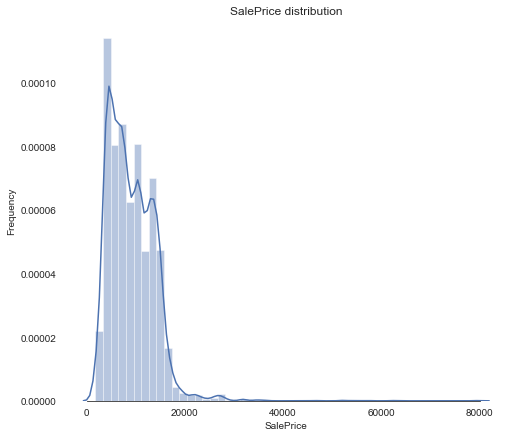

In [115]:
# sns.distplot(train['Price'], color = 'b')
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))

#Check the new distribution
sns.distplot(train['Price'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")
sns.despine(trim=True, left=True)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013D8535D1D0>]],
      dtype=object)

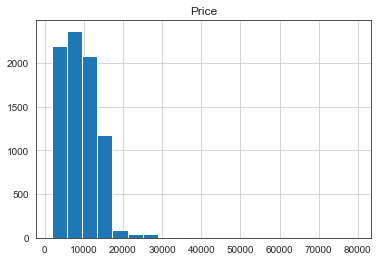

In [116]:
train.hist(column = 'Price', bins = 20)

In [117]:
train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [118]:
print(train['Airline'].value_counts())
print(train['Airline'].value_counts().count())

Airline A    2881
Airline B    1550
Airline C    1287
Airline D     906
Airline E     625
Airline F     360
Airline G     235
Airline H     146
Airline I      12
Airline J       6
Airline K       3
Airline L       1
Name: Airline, dtype: int64
12


In [119]:
print(train['Route'].value_counts())
print(train['Route'].value_counts().count())

DEL → BOM → COK                1784
BLR → DEL                      1172
CCU → BOM → BLR                 752
CCU → BLR                       537
BOM → HYD                       468
CCU → DEL → BLR                 418
BLR → BOM → DEL                 300
MAA → CCU                       289
DEL → HYD → COK                 250
DEL → JAI → BOM → COK           176
DEL → BLR → COK                 170
DEL → COK                       164
DEL → AMD → BOM → COK           149
DEL → MAA → COK                 105
DEL → IDR → BOM → COK            69
DEL → HYD → MAA → COK            60
DEL → NAG → BOM → COK            57
CCU → MAA → BLR                  45
DEL → GOI → BOM → COK            44
DEL → HYD → BOM → COK            43
CCU → HYD → BLR                  40
DEL → PNQ → COK                  38
CCU → BBI → BLR                  36
DEL → BHO → BOM → COK            36
CCU → GAU → BLR                  33
CCU → IXR → DEL → BLR            31
DEL → ATQ → BOM → COK            30
DEL → LKO → BOM → COK       

In [120]:
print(train['Date_of_Journey'].value_counts())
print(train['Date_of_Journey'].value_counts().count())

6/06/2019     390
18/05/2019    385
9/06/2019     384
12/06/2019    379
9/05/2019     363
21/05/2019    351
21/03/2019    316
15/05/2019    314
27/05/2019    293
24/06/2019    264
15/06/2019    255
27/06/2019    253
1/06/2019     250
24/03/2019    245
3/06/2019     243
27/03/2019    227
6/03/2019     226
24/05/2019    224
12/05/2019    202
1/05/2019     201
6/05/2019     200
1/04/2019     195
9/03/2019     156
3/03/2019     139
15/03/2019    122
18/03/2019    119
01/03/2019    115
12/03/2019    102
9/04/2019      92
6/04/2019      80
18/06/2019     79
3/04/2019      79
21/06/2019     78
09/03/2019     77
06/03/2019     74
15/04/2019     72
03/03/2019     72
24/04/2019     67
3/05/2019      65
27/04/2019     64
21/04/2019     59
18/04/2019     52
12/04/2019     50
1/03/2019      39
Name: Date_of_Journey, dtype: int64
44


In [121]:
print(train['Source'].value_counts())
print(train['Source'].value_counts().count())

Delhi       3398
Kolkata     2152
Banglore    1650
Mumbai       523
Chennai      289
Name: Source, dtype: int64
5


In [122]:
print(train['Destination'].value_counts())
print(train['Destination'].value_counts().count())

Cochin       3398
Banglore     2152
Delhi         956
New Delhi     694
Hyderabad     523
Kolkata       289
Name: Destination, dtype: int64
6


In [123]:
print(train['Total_Stops'].value_counts())
print(train['Total_Stops'].value_counts().count())

1 stop      4235
non-stop    2630
2 stops     1112
3 stops       34
Name: Total_Stops, dtype: int64
4


In [124]:
print(train['Additional_Info'].value_counts())
print(train['Additional_Info'].value_counts().count())

No info                         6251
In-flight meal not included     1492
No check-in baggage included     249
1 Long layover                     9
No Info                            3
Business class                     3
Change airports                    2
1 Short layover                    1
2 Long layover                     1
Red-eye flight                     1
Name: Additional_Info, dtype: int64
10


In [125]:
print(train['Dep_Time'].value_counts())
print(train['Dep_Time'].value_counts().count())

18:55    189
17:00    171
07:05    163
10:00    161
09:00    146
07:10    144
09:35    140
20:00    140
07:00    133
21:10    127
14:05    124
13:00    123
10:20    121
11:30    119
11:40    113
06:30    113
08:00    112
06:00    105
09:45    102
08:25     97
20:25     96
05:45     94
05:30     93
17:45     91
08:20     89
16:30     84
22:50     80
12:00     78
16:55     78
07:30     76
16:00     74
19:45     72
17:15     72
15:15     69
19:35     67
19:30     66
17:30     66
09:25     63
09:40     62
08:45     61
13:15     58
04:55     57
07:35     57
09:30     56
21:25     56
02:15     56
20:55     56
06:50     55
15:00     54
21:50     53
05:50     52
05:55     52
14:00     52
20:20     52
06:55     52
11:10     51
10:35     51
22:20     50
17:10     50
06:40     49
14:35     49
16:45     47
23:30     45
07:55     45
23:05     44
22:00     43
08:30     43
19:00     43
09:10     43
08:55     42
21:05     42
06:05     42
18:15     42
05:15     41
21:00     40
        ... 
03:50     13

In [126]:
print(train['Arrival_Time'].value_counts())
print(train['Arrival_Time'].value_counts().count())

19:00           303
21:00           275
19:15           257
16:10           114
12:35            92
20:45            86
18:50            85
22:30            83
19:50            79
22:50            77
21:20            68
11:20            68
12:20            62
21:05            54
23:35            53
20:05            53
22:25            53
14:05            52
11:25            48
19:45            46
10:40            46
12:00            45
23:00            45
15:30            44
09:30            43
18:10            43
13:15            42
12:55            42
08:45            41
08:35            41
08:50            40
12:10            40
19:35            40
22:00            40
16:20            40
10:35            40
07:15            39
22:35            39
18:15            39
10:05            38
07:45            38
10:10            37
22:20            37
19:40            37
21:50            36
13:20            36
22:55            36
04:25 07 Jun     35
10:15            33
13:55            33


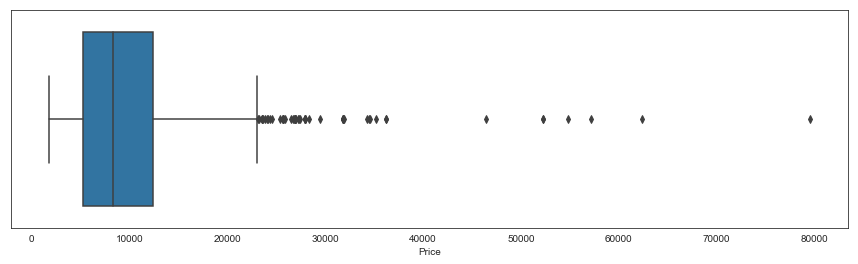

In [127]:
plt.figure(figsize = (15, 4))
sns.boxplot(train['Price'])

In [128]:
print(train['Price'])

0        7480
1        8016
2        8879
3        9663
4        9663
5        3625
6       10919
7        5510
8       14441
9       13470
10       6373
11       6790
12      14237
13       9134
14       8635
15       4823
16      12121
17       4227
18       4591
19      16736
20       8266
21      10197
22       7580
23       2754
24       2227
25       6121
26      13029
27      11982
28       7174
29       8273
30       6795
31       7408
32       4423
33       3419
34       8309
35      12802
36       6297
37       5277
38       6442
39      14300
40       3919
41       8085
42       2050
43      12723
44      10844
45      13376
46       6121
47       8016
48       4823
49      16439
50       4591
51      13344
52      10262
53      13941
54       5201
55       6610
56       8610
57      11234
58       5678
59       5642
60       4963
61       7189
62       4226
63       6300
64      15135
65       6216
66       3597
67       9385
68      21375
69       4174
70      14861
71    

In [129]:
print(train.loc[1])

Airline             Airline A
Date_of_Journey    18/06/2019
Source               Banglore
Destination             Delhi
Route               BLR → DEL
Dep_Time                18:55
Arrival_Time            22:00
Duration                3h 5m
Total_Stops          non-stop
Additional_Info       No info
Price                    8016
Name: 1, dtype: object


In [130]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Airline B,27-03-2019,Delhi,Cochin,DEL → HYD → COK,04:55,16:10,11h 15m,1 stop,No info
1,Airline E,27-05-2019,Kolkata,Banglore,CCU → BLR,22:20,28-05-2020 00:40,2h 20m,non-stop,No info
2,Airline C,06-06-2019,Kolkata,Banglore,CCU → IXR → DEL → BLR,05:50,20:25,14h 35m,2 stops,No info
3,Airline A,06-03-2019,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,No info
4,Airline B,15-06-2019,Delhi,Cochin,DEL → BOM → COK,16:00,16-06-2020 01:30,9h 30m,1 stop,No info


In [131]:
test.shape

(2671, 10)

In [132]:
sam.head(10)

,Price
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [133]:
sam.shape

(2671, 1)

## Preprocessing

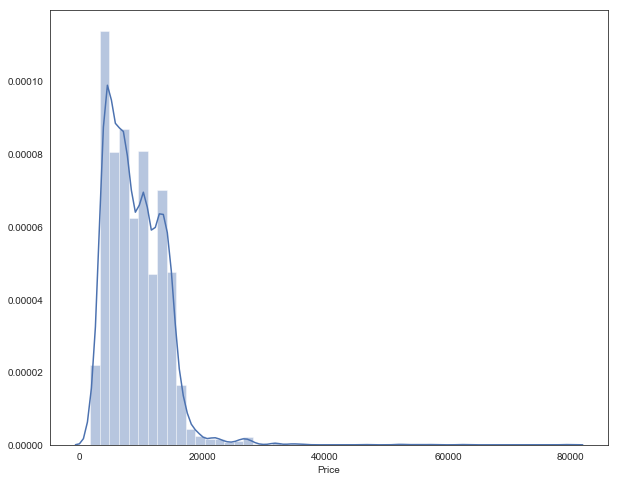

In [134]:
plt.figure(figsize = (10,8))
sns.distplot(train['Price'], color="b")

In [135]:
# train['Price'] = train['Price'].apply(lambda x: np.log(x + 1))

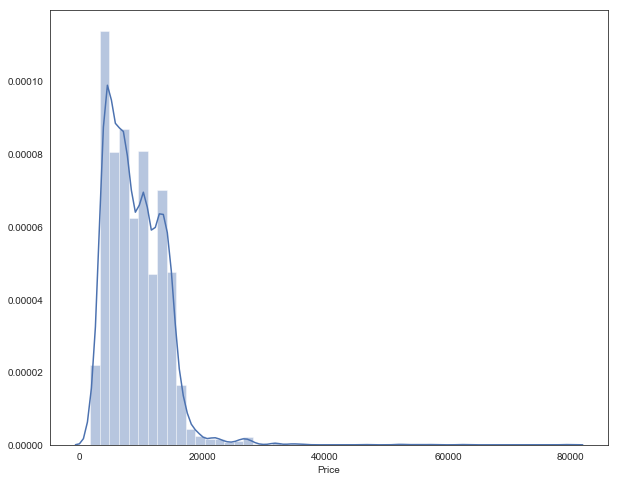

In [136]:
plt.figure(figsize = (10,8))
sns.distplot(train['Price'], color="b")

In [137]:
train_lables = train['Price']
train_features = train.drop(['Price'], 1)

test_features = test

all_features = pd.concat([train_features, test_features])

In [138]:
all_features.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Airline C,12/06/2019,Delhi,Cochin,DEL → MAA → COK,20:40,09:25 13 Jun,12h 45m,1 stop,No info
1,Airline A,18/06/2019,Banglore,Delhi,BLR → DEL,18:55,22:00,3h 5m,non-stop,No info
2,Airline C,18/05/2019,Delhi,Cochin,DEL → BOM → COK,03:50,19:15,15h 25m,1 stop,No info
3,Airline A,6/05/2019,Kolkata,Banglore,CCU → BOM → BLR,20:00,08:15 07 May,12h 15m,1 stop,In-flight meal not included
4,Airline A,9/05/2019,Kolkata,Banglore,CCU → BOM → BLR,06:30,12:00,5h 30m,1 stop,In-flight meal not included


In [139]:
all_features.shape

(10683, 10)

In [140]:
all_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10683 entries, 0 to 2670
Data columns (total 10 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
dtypes: object(10)
memory usage: 918.1+ KB


In [141]:
all_features['Date_of_Journey'] = pd.to_datetime(all_features['Date_of_Journey'])
all_features['Year'] = all_features['Date_of_Journey'].dt.year

In [142]:
all_features['Date_of_Journey'] = pd.to_datetime(all_features['Date_of_Journey'])
all_features['Month'] = all_features['Date_of_Journey'].dt.month

In [143]:
all_features['Date_of_Journey'] = pd.to_datetime(all_features['Date_of_Journey'])
all_features['Day'] = all_features['Date_of_Journey'].dt.day

In [144]:
all_features.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Year,Month,Day
0,Airline C,2019-12-06,Delhi,Cochin,DEL → MAA → COK,20:40,09:25 13 Jun,12h 45m,1 stop,No info,2019,12,6
1,Airline A,2019-06-18,Banglore,Delhi,BLR → DEL,18:55,22:00,3h 5m,non-stop,No info,2019,6,18
2,Airline C,2019-05-18,Delhi,Cochin,DEL → BOM → COK,03:50,19:15,15h 25m,1 stop,No info,2019,5,18
3,Airline A,2019-06-05,Kolkata,Banglore,CCU → BOM → BLR,20:00,08:15 07 May,12h 15m,1 stop,In-flight meal not included,2019,6,5
4,Airline A,2019-09-05,Kolkata,Banglore,CCU → BOM → BLR,06:30,12:00,5h 30m,1 stop,In-flight meal not included,2019,9,5


In [145]:
all_features = all_features.drop(['Date_of_Journey'], 1)

In [146]:
all_features.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Year,Month,Day
0,Airline C,Delhi,Cochin,DEL → MAA → COK,20:40,09:25 13 Jun,12h 45m,1 stop,No info,2019,12,6
1,Airline A,Banglore,Delhi,BLR → DEL,18:55,22:00,3h 5m,non-stop,No info,2019,6,18
2,Airline C,Delhi,Cochin,DEL → BOM → COK,03:50,19:15,15h 25m,1 stop,No info,2019,5,18
3,Airline A,Kolkata,Banglore,CCU → BOM → BLR,20:00,08:15 07 May,12h 15m,1 stop,In-flight meal not included,2019,6,5
4,Airline A,Kolkata,Banglore,CCU → BOM → BLR,06:30,12:00,5h 30m,1 stop,In-flight meal not included,2019,9,5


In [147]:
all_features['Additional_Info'] = all_features['Additional_Info'].mask(all_features['Additional_Info'] == 'No info', 'No Info')

In [148]:
all_features['Additional_Info'].value_counts()

No Info                         8348
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [149]:
# all_features['Arrival_Time'] = all_features['Arrival_Time'].astype(str).str[:-5]

In [150]:
# print(all_features['Arrival_Time'].value_counts())
# print(all_features['Arrival_Time'].value_counts().count())

In [151]:
all_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10683 entries, 0 to 2670
Data columns (total 12 columns):
Airline            10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Year               10683 non-null int64
Month              10683 non-null int64
Day                10683 non-null int64
dtypes: int64(3), object(9)
memory usage: 1.1+ MB


In [152]:
all_features = all_features.drop(['Dep_Time', 'Arrival_Time'], 1)

In [153]:
len(all_features.columns)

10

In [154]:
train.sort_values(by = ['Price'], ascending = False)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
1870,Airline J,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,11:25,5h 40m,1 stop,Business class,79512
3343,Airline J,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,12:25,6h 40m,1 stop,Business class,62427
6894,Airline J,01/03/2019,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,Business class,57209
3241,Airline A,18/03/2019,Banglore,New Delhi,BLR → BOM → DEL,22:50,05:05 16 Mar,6h 15m,1 stop,No info,54826
2368,Airline J,6/03/2019,Delhi,Cochin,DEL → ATQ → BOM → COK,20:05,04:25 07 Mar,8h 20m,2 stops,No info,52285
5734,Airline J,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,10:45,5h,1 stop,No info,52229
1271,Airline J,3/03/2019,Delhi,Cochin,DEL → ATQ → BOM → COK,20:05,04:25 04 Mar,8h 20m,2 stops,No info,46490
4412,Airline A,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,14:05,19:10,5h 5m,1 stop,No info,36235
7412,Airline A,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,14:05,21:20,7h 15m,1 stop,No info,36235
746,Airline A,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:40,00:45 02 Mar,6h 5m,1 stop,No info,35185


In [155]:
all_features.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Year,Month,Day
0,Airline C,Delhi,Cochin,DEL → MAA → COK,12h 45m,1 stop,No Info,2019,12,6
1,Airline A,Banglore,Delhi,BLR → DEL,3h 5m,non-stop,No Info,2019,6,18
2,Airline C,Delhi,Cochin,DEL → BOM → COK,15h 25m,1 stop,No Info,2019,5,18
3,Airline A,Kolkata,Banglore,CCU → BOM → BLR,12h 15m,1 stop,In-flight meal not included,2019,6,5
4,Airline A,Kolkata,Banglore,CCU → BOM → BLR,5h 30m,1 stop,In-flight meal not included,2019,9,5


In [156]:
all_features.shape

(10683, 10)

In [157]:
all_features.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Year', 'Month', 'Day'],
      dtype='object')

In [158]:
all_features = pd.get_dummies(all_features).reset_index(drop=True)
all_features.shape

(10683, 536)

In [159]:
all_features.head()

,Year,Month,Day,Airline_Airline A,Airline_Airline B,Airline_Airline C,Airline_Airline D,Airline_Airline E,Airline_Airline F,Airline_Airline G,Airline_Airline H,Airline_Airline I,Airline_Airline J,Airline_Airline K,Airline_Airline L,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Route_BLR → AMD → DEL,Route_BLR → BBI → DEL,Route_BLR → BDQ → DEL,Route_BLR → BOM → AMD → DEL,Route_BLR → BOM → BHO → DEL,Route_BLR → BOM → DEL,Route_BLR → BOM → IDR → DEL,Route_BLR → BOM → IDR → GWL → DEL,Route_BLR → BOM → IXC → DEL,Route_BLR → BOM → JDH → DEL,Route_BLR → BOM → NAG → DEL,Route_BLR → BOM → UDR → DEL,Route_BLR → CCU → BBI → DEL,Route_BLR → CCU → BBI → HYD → DEL,Route_BLR → CCU → BBI → HYD → VGA → DEL,Route_BLR → CCU → DEL,Route_BLR → CCU → GAU → DEL,Route_BLR → COK → DEL,Route_BLR → DEL,Route_BLR → GAU → DEL,Route_BLR → GOI → DEL,Route_BLR → HBX → BOM → AMD → DEL,Route_BLR → HBX → BOM → BHO → DEL,Route_BLR → HBX → BOM → NAG → DEL,Route_BLR → HYD → DEL,Route_BLR → HYD → VGA → DEL,Route_BLR → IDR → DEL,Route_BLR → LKO → DEL,Route_BLR → MAA → DEL,Route_BLR → NAG → DEL,Route_BLR → PNQ → DEL,Route_BLR → STV → DEL,Route_BLR → TRV → COK → DEL,Route_BLR → VGA → DEL,Route_BLR → VGA → HYD → DEL,Route_BLR → VGA → VTZ → DEL,Route_BOM → AMD → ISK → HYD,Route_BOM → BBI → HYD,Route_BOM → BDQ → DEL → HYD,Route_BOM → BHO → DEL → HYD,Route_BOM → BLR → CCU → BBI → HYD,Route_BOM → BLR → HYD,Route_BOM → CCU → HYD,Route_BOM → COK → MAA → HYD,Route_BOM → DED → DEL → HYD,Route_BOM → DEL → HYD,Route_BOM → GOI → HYD,Route_BOM → GOI → PNQ → HYD,Route_BOM → HYD,Route_BOM → IDR → DEL → HYD,Route_BOM → JAI → DEL → HYD,Route_BOM → JDH → DEL → HYD,Route_BOM → JDH → JAI → DEL → HYD,Route_BOM → JLR → HYD,Route_BOM → MAA → HYD,Route_BOM → NDC → HYD,Route_BOM → RPR → VTZ → HYD,Route_BOM → UDR → DEL → HYD,Route_BOM → VNS → DEL → HYD,Route_CCU → AMD → BLR,Route_CCU → BBI → BLR,Route_CCU → BBI → BOM → BLR,Route_CCU → BBI → HYD → BLR,Route_CCU → BBI → IXR → DEL → BLR,Route_CCU → BLR,Route_CCU → BOM → AMD → BLR,Route_CCU → BOM → BLR,Route_CCU → BOM → COK → BLR,Route_CCU → BOM → GOI → BLR,Route_CCU → BOM → HBX → BLR,Route_CCU → BOM → PNQ → BLR,Route_CCU → BOM → TRV → BLR,Route_CCU → DEL → AMD → BLR,Route_CCU → DEL → BLR,Route_CCU → DEL → COK → BLR,Route_CCU → DEL → COK → TRV → BLR,Route_CCU → DEL → VGA → BLR,Route_CCU → GAU → BLR,Route_CCU → GAU → DEL → BLR,Route_CCU → GAU → IMF → DEL → BLR,Route_CCU → HYD → BLR,Route_CCU → IXA → BLR,Route_CCU → IXB → BLR,Route_CCU → IXB → DEL → BLR,Route_CCU → IXR → BBI → BLR,Route_CCU → IXR → DEL → BLR,Route_CCU → IXZ → MAA → BLR,Route_CCU → JAI → BOM → BLR,Route_CCU → JAI → DEL → BLR,Route_CCU → KNU → BLR,Route_CCU → MAA → BLR,Route_CCU → NAG → BLR,Route_CCU → PAT → BLR,Route_CCU → PNQ → BLR,Route_CCU → RPR → HYD → BLR,Route_CCU → VNS → DEL → BLR,Route_CCU → VTZ → BLR,Route_DEL → AMD → BOM → COK,Route_DEL → AMD → COK,Route_DEL → ATQ → BOM → COK,Route_DEL → BBI → COK,Route_DEL → BDQ → BOM → COK,Route_DEL → BHO → BOM → COK,Route_DEL → BLR → COK,Route_DEL → BOM → COK,Route_DEL → CCU → BOM → COK,Route_DEL → COK,Route_DEL → DED → BOM → COK,Route_DEL → GOI → BOM → COK,Route_DEL → GWL → IDR → BOM → COK,Route_DEL → HYD → BOM → COK,Route_DEL → HYD → COK,Route_DEL → HYD → MAA → COK,Route_DEL → IDR → BOM → COK,Route_DEL → IXC → BOM → COK,Route_DEL → IXU → BOM → COK,Route_DEL → JAI → BOM → COK,Route_DEL → JDH → BOM → COK,Route_DEL → LKO → BOM → COK,Route_DEL → LKO → COK,Route_DEL → MAA → BOM → COK,Route_DEL → MAA → COK,Route_DEL → NAG → BOM → COK,Route_DEL → PNQ → COK,Route_DEL → RPR → NAG → BOM → COK,Route_DEL → TRV → COK,Route_DEL → UDR → BOM → COK,Route_MAA → CCU,Duration_10h,Duration_10h 10m,Duration_10h 15m,Duration_10h 20m,Duration_10h 25m,Duration_10h 30m,Duration_10h 35m,Duration_10h 40m,Duration_10h 45m,Duration_10h 50m,Duration_10h 55m,Duration_10h 5m,Duration_11h,Duration_11h 10m,Duration_11h 15m,D

In [160]:
# Recreating train and test data

X = all_features.iloc[:len(train_lables), :]
y = train_lables
X_test_new = all_features.iloc[len(train_lables):, : ]
X.shape, y.shape, X_test_new.shape

((8012, 536), (8012,), (2671, 536))

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6009, 536), (2003, 536), (6009,), (2003,))

In [162]:
lr = LinearRegression()

lr.fit(X, y)
lr_score = lr.score(X, y)

# lr.fit(X_train, y_train)
# lr_score = lr.score(X_test, y_test)

print(lr_score)

0.7780308801407647


In [163]:
lr_pred = lr.predict(X)

print(mean_absolute_error(y, lr_pred))
print(mean_squared_error(y, lr_pred))
print(sqrt(mean_squared_error(y, lr_pred)))

1422.5424622681855
4750736.652955432
2179.6184649968977


In [81]:
knn_reg = KNeighborsRegressor(n_neighbors = 5)
score_knn_reg=cross_val_score(knn_reg, X, y, cv=10)
score_knn_reg.mean()

# knn_reg.fit(X, y)
# knn_reg.score(X, y)

knn_reg.fit(X, y)
knn_reg.score(X, y)

0.9099440629103099

In [83]:
knn_reg_pred = knn_reg.predict(X)

print(mean_absolute_error(y, knn_reg_pred))
print(mean_squared_error(y, knn_reg_pred))
print(sqrt(mean_squared_error(y, knn_reg_pred)))

0.10057697395100894
0.02374101582659698
0.1540811988095789


In [84]:
xgb_regressor = XGBRegressor()

xgb_regressor.fit(X, y)
xgb_regressor.score(X, y)

[18:50:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.8682466028652694

In [85]:
xgb_regressor_pred = xgb_regressor.predict(X)

print(mean_absolute_error(y, xgb_regressor_pred))
print(mean_squared_error(y, xgb_regressor_pred))
print(sqrt(mean_squared_error(y, xgb_regressor_pred)))

0.13987241957932342
0.03473351771875186
0.1863693046581219


In [164]:
rf_regressor = RandomForestRegressor()

rf_regressor.fit(X, y)
rf_regressor.score(X, y)

0.9680375817808416

In [165]:
rf_regressor_pred = rf_regressor.predict(X)

print(mean_absolute_error(y, rf_regressor_pred))
print(mean_squared_error(y, rf_regressor_pred))
print(sqrt(mean_squared_error(y, rf_regressor_pred)))

354.5488453056554
684081.785102093
827.0923679384866


In [166]:
dt_regressor = DecisionTreeRegressor()

dt_regressor.fit(X, y)
dt_regressor.score(X, y)

0.981708019756772

In [167]:
dt_regressor_pred = dt_regressor.predict(X)

print(mean_absolute_error(y, dt_regressor_pred))
print(mean_squared_error(y, dt_regressor_pred))
print(sqrt(mean_squared_error(y, dt_regressor_pred)))

148.20603558947295
391497.614856287
625.6977024540581


In [168]:
Predictions = dt_regressor.predict(X_test_new)

In [169]:
print(Predictions)

[ 6442.  3873. 12093. ... 13344.  4030.  6853.]


In [170]:
# making dataframe of the predicted values

df = pd.DataFrame({'Price': Predictions})

In [171]:
# Print first five rows of our predicted data values

df.head()

,Price
0,6442.0
1,3873.0
2,12093.0
3,19225.0
4,6316.0


In [172]:
# Save the prediction data in a file at the desire location

df.to_csv('C:/Users/admin/Desktop/data/New folder/pred_data.csv', index = False)

In [173]:
# Read the saved precticted file at the location 'C:/Users/admin/Desktop/data/Data Sets/Credit card cunsumption/pred_data.csv'

data = pd.read_csv('C:/Users/admin/Desktop/data/New folder/pred_data.csv')

In [174]:
# Print first five rows of our saved predicted file 

data.head()

,Price
0,6442.0
1,3873.0
2,12093.0
3,19225.0
4,6316.0


In [175]:
data.shape

(2671, 1)